In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten ,Softmax,Dense,Conv2D,MaxPool2D
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import PIL as pil

In [2]:
classes = os.listdir("data")

In [ ]:
for i in classes:

In [3]:
imagedataset = keras.utils.image_dataset_from_directory(
    "data",
    color_mode="rgb",
    image_size=(255, 255),
    batch_size=4
)


Found 28 files belonging to 2 classes.


 fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for i,img in enumerate(batch[0][0:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])
    
plt.show()/255.0

In [57]:
mapeddata = imagedataset.map(lambda x, y: (x/255.0, y))


In [59]:
train_X_size = int(0.6*len(mapeddata))
validation_X_size = int(0.2*len(mapeddata))
test_X_size = int(0.2*len(mapeddata))
train_X_size+=len(mapeddata)-(train_X_size+validation_X_size+test_X_size)

In [61]:
train_X = mapeddata.take(train_X_size)
validation_X = mapeddata.skip(train_X_size).take(validation_X_size)
test_X = mapeddata.skip(train_X_size+validation_X_size).take(test_X_size)

1


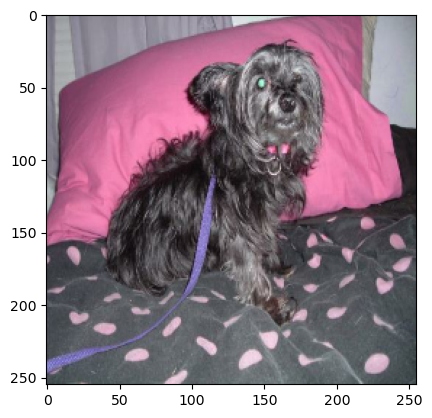

In [63]:
elm = train_X.as_numpy_iterator().next()
plt.imshow(elm[0][0])
print(elm[1][0])
plt.show()

In [180]:
model =  Sequential()

In [182]:
model.add(Conv2D(16, (3, 3),1, activation='relu', input_shape=(255, 255, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3),1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16, (3, 3),1, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [183]:
model.compile(optimizer="adam",loss=tf.losses.binary_crossentropy,metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 253, 253, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 126, 126, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [188]:
img  = pil.Image.open("190.jpg")

In [191]:
logdir = "logdir"
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [194]:
model.fit(train_X,callbacks=[callback],validation_data=validation_X,epochs=30)

Epoch 1/30
5/5 [==============================] - 6s 1s/step - loss: 45.2507 - accuracy: 0.4000 - val_loss: 25.8863 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 18.6075 - accuracy: 0.3500 - val_loss: 1.5122 - val_accuracy: 0.7500
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 3.3665 - accuracy: 0.6500 - val_loss: 5.3658 - val_accuracy: 0.2500
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 2.1191 - accuracy: 0.7000 - val_loss: 0.4263 - val_accuracy: 0.7500
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 0.9153 - accuracy: 0.8500 - val_loss: 0.1180 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 6s 1s/step - loss: 0.5757 - accuracy: 0.9000 - val_loss: 0.0514 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 5s 1s/step - loss: 0.3854 - accuracy: 0.7500 - val_loss: 0.9304 - val_accuracy: 0.5000
Epoch 8/30
5/5 [======================

In [154]:
history =  model.history.history

In [156]:
key = list(history.keys())
print(key)

['loss', 'accuracy', 'val_loss', 'val_accuracy']


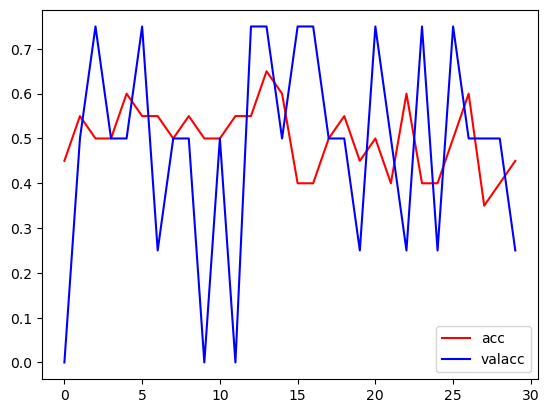

In [158]:
plt.plot(history[key[1]],color="red" ,label="acc" )
plt.plot(history[key[3]],color="blue" ,label="valacc" )
plt.legend()

(4, 255, 255, 3)
1/1 [==============================] - 0s 17ms/step
dog


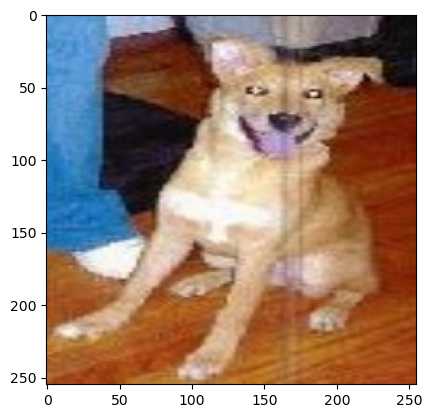

1/1 [==============================] - 0s 15ms/step
cat


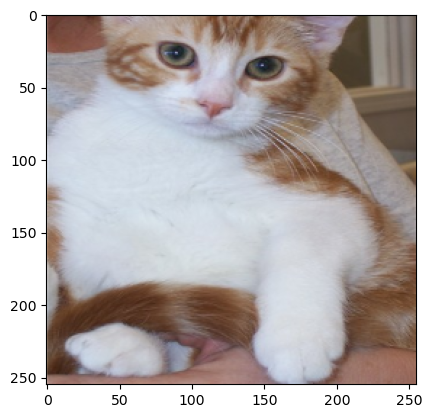

1/1 [==============================] - 0s 16ms/step
cat


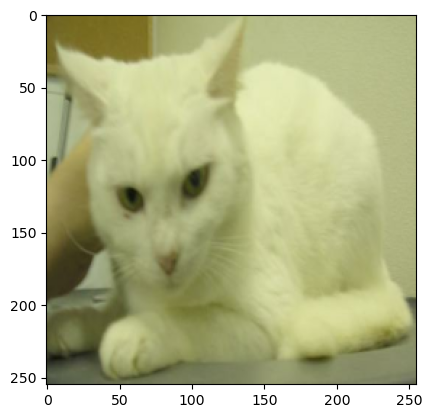

1/1 [==============================] - 0s 17ms/step
cat


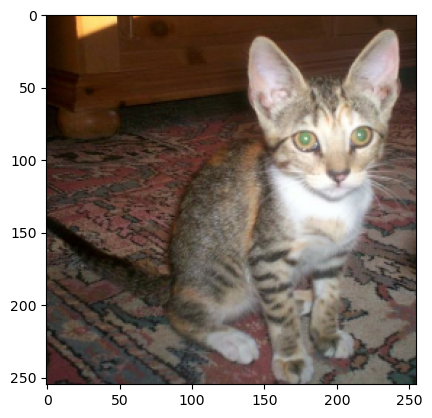

In [124]:
for batch in test_X.as_numpy_iterator(): 
    xs,y = batch
    print(xs.shape)
    for x in xs : 
        if(model.predict(np.expand_dims(x,axis=0 ))>=0.5):
            print("dog")
        else : 
            print("cat")
        plt.imshow(x)
        plt.show()

In [22]:
pic  = np.array(pil.Image.open("thisgirl.jpg").resize((255,255)))

In [24]:
picfolded = np.expand_dims(pic,axis=0)

In [30]:
result = model.predict(picfolded)
if (result>=0.5):
    print("dog")
else : 
    print("cat")


1/1 [==============================] - 0s 17ms/step
dog


In [5]:
model = keras.models.load_model("catvsdog.h5")